In [10]:
from sklearn.datasets import load_diabetes
import pandas as pd
dataset = load_diabetes()

In [11]:
X = pd.DataFrame(dataset['data'],columns=dataset['feature_names']) 
y = dataset['target']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [13]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268422,0.281806
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113187,0.165951
bmi,0.184695,0.033934,1.000000,0.394309,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
bp,0.314569,0.179283,0.394309,1.000000,0.239978,0.161457,-0.120827,0.212785,0.375295,0.374647
s1,0.270283,0.021069,0.266467,0.239978,1.000000,0.891063,0.053003,0.546840,0.528543,0.330773
s2,0.218952,0.120205,0.261560,0.161457,0.891063,1.000000,-0.190658,0.654675,0.307139,0.293291
s3,-0.043783,-0.355094,-0.354655,-0.120827,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
s4,0.180038,0.320490,0.430974,0.212785,0.546840,0.654675,-0.736685,1.000000,0.613472,0.431352
s5,0.268422,0.113187,0.468473,0.375295,0.528543,0.307139,-0.372437,0.613472,1.000000,0.478967
s6,0.281806,0.165951,0.404928,0.374647,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000


<Axes: >

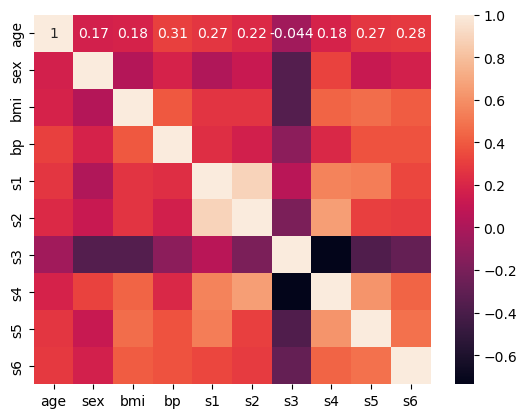

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.heatmap(X_train.corr(),annot=True)

In [17]:
from sklearn.tree import DecisionTreeRegressor
treeclassifier = DecisionTreeRegressor(max_depth=2)
treeclassifier.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [19]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
param_grid = {
'criterion':['squared_error','friedman_mse','absolute_error'],
'splitter':['best','random'],
'max_depth':[1,2,3,4,5,10,15,20,25],
'max_features':['auto','sqrt','log2']
}
grid = GridSearchCV(DecisionTreeRegressor() , param_grid=param_grid , cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [20]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 25,
 'max_features': 'auto',
 'splitter': 'random'}

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = grid.predict(X_test)
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         0
        42.0       0.00      0.00      0.00         1
        43.0       0.00      0.00      0.00         0
        44.0       0.00      0.00      0.00         0
        48.0       0.00      0.00      0.00         2
        51.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         2
        53.0       0.00      0.00      0.00         0
        60.0       0.00      0.00      0.00         1
        61.0       0.00      0.00      0.00         1
        63.0       0.00      0.00      0.00         2
        64.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         0
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         1
        69.0       0.00      0.00      0.00         1
        70.0       0.00    

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.005\nsquared_error = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.5, 'x[8] <= 0.006\nsquared_error = 3612.73\nsamples = 209\nvalue = 118.043'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2378.339\nsamples = 152\nvalue = 100.559'),
 Text(0.375, 0.16666666666666666, 'squared_error = 3915.52\nsamples = 57\nvalue = 164.667'),
 Text(0.75, 0.5, 'x[2] <= 0.073\nsquared_error = 5119.262\nsamples = 144\nvalue = 205.542'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4557.346\nsamples = 118\nvalue = 191.102'),
 Text(0.875, 0.16666666666666666, 'squared_error = 2428.302\nsamples = 26\nvalue = 271.077')]

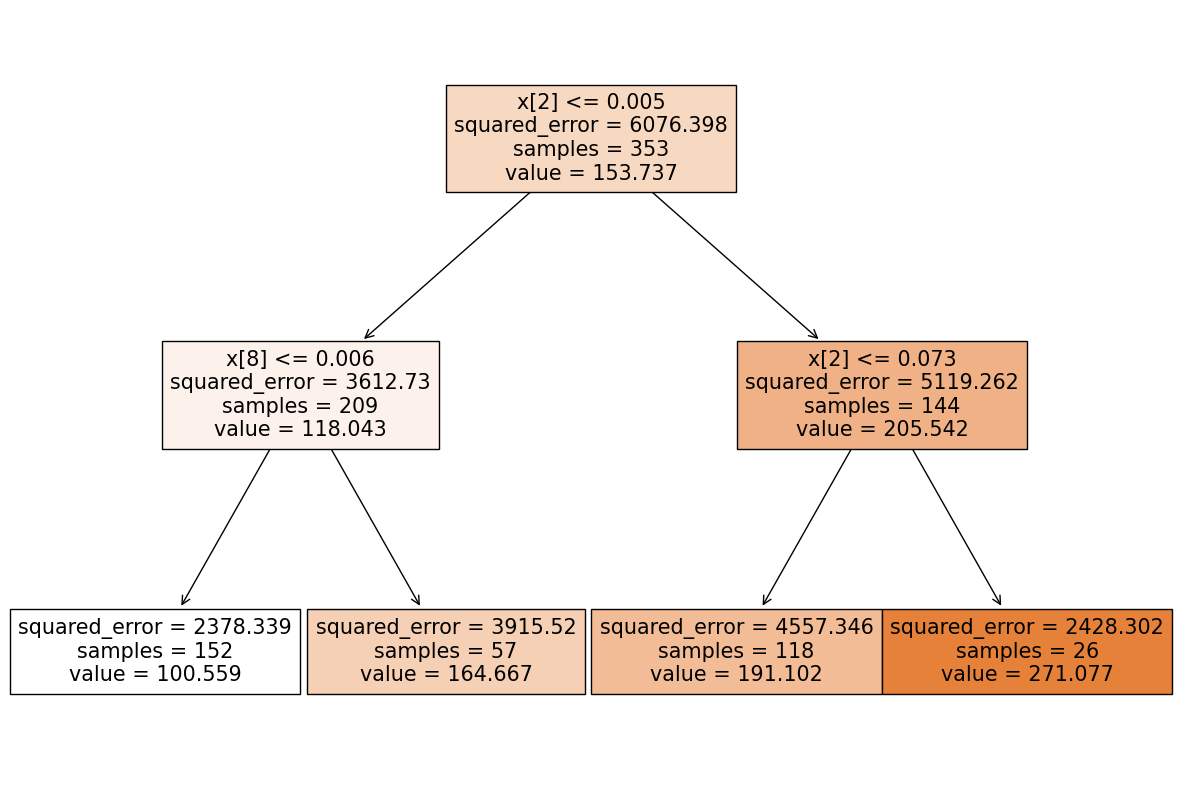

In [22]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)